# Identify Fraud from Enron Email
## Using Machine Learning Techniques
### by David Vartanian

## References

### Documentation links

* http://scikit-learn.org/stable/modules/generated/sklearn.decomposition.PCA.html
* http://scikit-learn.org/stable/modules/generated/sklearn.feature_selection.SelectKBest.html
* http://scikit-learn.org/stable/modules/generated/sklearn.feature_selection.SelectPercentile.html
* http://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.MinMaxScaler.html
* http://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.TfidfVectorizer.html
* http://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html
* http://scikit-learn.org/stable/modules/generated/sklearn.naive_bayes.GaussianNB.html
* http://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html
* http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html
* http://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html
* http://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html#sklearn.neighbors.KNeighborsClassifier
* http://scikit-learn.org/stable/modules/generated/sklearn.model_selection.KFold.html
* http://scikit-learn.org/stable/modules/generated/sklearn.metrics.f1_score.html
* http://scikit-learn.org/stable/modules/generated/sklearn.metrics.precision_score.html
* http://scikit-learn.org/stable/modules/generated/sklearn.metrics.recall_score.html
* http://scikit-learn.org/stable/modules/generated/sklearn.metrics.confusion_matrix.html
* http://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.Imputer.html

### Useful links

* https://www.quora.com/What-are-C-and-gamma-with-regards-to-a-support-vector-machine
* https://www.quora.com/What-is-the-best-way-to-understand-the-terms-precision-and-recall
* https://en.wikipedia.org/wiki/Precision_and_recall
* https://en.wikipedia.org/wiki/F1_score
* https://stats.stackexchange.com/questions/49540/understanding-stratified-cross-validation

In [1]:
# notebook/visualisation imports
import matplotlib.pyplot as plt
from IPython.display import display
%load_ext autoreload
%autoreload 2

In [9]:
# poi_id.py
#!/usr/bin/python

import sys
import pickle
from time import time

from udacity import featureFormat, targetFeatureSplit
from tester import dump_classifier_and_data

In [3]:
### Task 1: Select what features you'll use.
### features_list is a list of strings, each of which is a feature name.
### The first feature must be "poi".
features_list = ['poi', 'salary', 'bonus', 'director_fees', 'other', 'exercised_stock_options', 'expenses'] # You will need to use more features

### Load the dictionary containing the dataset
with open("final_project_dataset.pkl", "r") as data_file:
    data_dict = pickle.load(data_file)
print 'Keys:'
display(sorted(data_dict[data_dict.keys()[0]].keys()))

Keys:


['bonus',
 'deferral_payments',
 'deferred_income',
 'director_fees',
 'email_address',
 'exercised_stock_options',
 'expenses',
 'from_messages',
 'from_poi_to_this_person',
 'from_this_person_to_poi',
 'loan_advances',
 'long_term_incentive',
 'other',
 'poi',
 'restricted_stock',
 'restricted_stock_deferred',
 'salary',
 'shared_receipt_with_poi',
 'to_messages',
 'total_payments',
 'total_stock_value']

### Keys:

* **bonus**: Reflects annual cash incentives paid based upon company performance. Also may include other retention payments.
* **deferral_payments**: Reflects distributions from a deferred compensation arrangement due to termination of employment or due to in-service withdrawals as per plan provisions.
* **deferred_income**: Reflects voluntary executive deferrals of salary, annual cash incentives, and long-term cash incentives as well as cash fees deferred by non-employee directors under a deferred compensation arrangement. May also reflect deferrals under a stock option or phantom stock unit in lieu of cash arrangement.
* **director_fees**: Reflects cash payments and/or value of stock grants made in lieu of cash payments to non-employee directors.
* **email_address**: This person's email address
* **exercised_stock_options**: Reflects amounts from exercised stock options which equal the market value in excess of the exercise price on the date the options were exercised either through cashless (same-day sale), stock swap or cash exercises. The reflected gain may differ from that realized by the insider due to fluctuations in the market price and the timing of any subsequent sale of the securities.
* **expenses**: Reflects reimbursements of business expenses. May include fees paid for consulting services.
* **from_messages**: Messages sent from this person
* **from_poi_to_this_person**: Messages sent from this person to a POI
* **from_this_person_to_poi**: Messages sent from a POI to this person
* **loan_advances**: Reflects total amount of loan advances, excluding repayments, provided by the Debtor in return for a promise of repayment. In certain instances, the terms of the promissory notes allow for the option to repay with stock of the company.
* **long_term_incentive**: Reflects long-term incentive cash payments from various long-term incentive programs designed to tie executive compensation to long-term success as measured against key performance drivers and business objectives over a multi-year period, generally 3 to 5 years.
* **other**: Reflects items such as payments for severence, consulting services, relocation costs, tax advances and allowances for employees on international assignment (i.e. housing allowances, cost of living allowances, payments under Enron’s Tax Equalization Program, etc.). May also include payments provided with respect to employment agreements, as well as imputed income amounts for such things as use of corporate aircraft.
* **poi**: Whether this person is a POI
* **restricted_stock**: Reflects the gross fair market value of shares and accrued dividends (and/or phantom units and dividend equivalents) on the date of release due to lapse of vesting periods, regardless of whether deferred.
* **restricted_stock_deferred**: Reflects value of restricted stock voluntarily deferred prior to release under a deferred compensation arrangement.
* **salary**: Reflects items such as base salary, executive cash allowances, and benefits payments.
* **shared_receipt_with_poi**: Bill shared with a POI
* **to_messages**: Messages sent to this person
* **total_payments**: Sum of all payments
* **total_stock_value**: Sum of all stock operations

#### Possible POI financial features

* bonus
* deferral_payments
* deffered_income
* director_fees
* exercised_stock_options
* expenses
* long_term_incentive
* other

#### Possible POI non-financial features

* from_poi_to_this_person
* from_this_person_to_poi
* shared_receipt_with_poi


#### Comments
I need to know what all variables mean in order to come up with possible outliers and feature selection/engineering.

Distribution of salary:


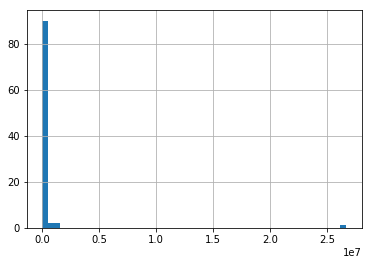

{'argmax': 'TOTAL',
 'count': 146,
 'iqr': array([ 211816.,  312117.]),
 'max': 26704229.0,
 'mean': 365811.35616438359,
 'median': 259996.0,
 'min': 477.0,
 'std': 2702034.6526232096}

Distribution of bonus:


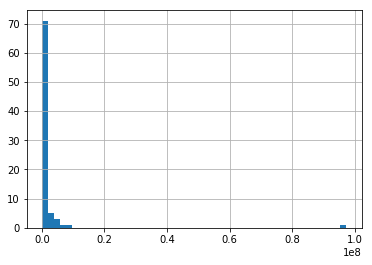

{'argmax': 'TOTAL',
 'count': 146,
 'iqr': array([  431250.,  1200000.]),
 'max': 97343619.0,
 'mean': 1333474.2328767122,
 'median': 769375.0,
 'min': 70000.0,
 'std': 10647802.412658392}

Distribution of director_fees:


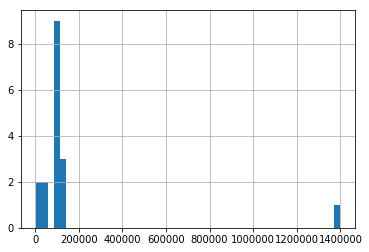

{'argmax': 'TOTAL',
 'count': 146,
 'iqr': array([  98784.,  113784.]),
 'max': 1398517.0,
 'mean': 19422.486301369863,
 'median': 108579.0,
 'min': 3285.0,
 'std': 310340.25202725327}

Distribution of other:


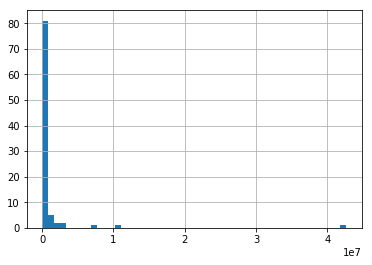

{'argmax': 'TOTAL',
 'count': 146,
 'iqr': array([   1215.,  362096.]),
 'max': 42667589.0,
 'mean': 585431.79452054796,
 'median': 52382.0,
 'min': 2.0,
 'std': 4564512.8195495447}

Distribution of exercised_stock_options:


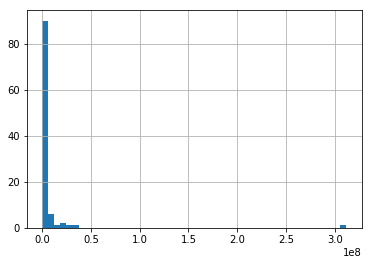

{'argmax': 'TOTAL',
 'count': 146,
 'iqr': array([  527886.25,  2547724.  ]),
 'max': 311764000.0,
 'mean': 4182736.1986301369,
 'median': 1310813.5,
 'min': 3285.0,
 'std': 30909366.79217739}

Distribution of expenses:


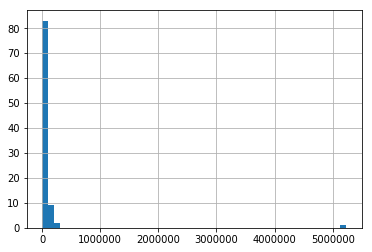

{'argmax': 'TOTAL',
 'count': 146,
 'iqr': array([ 22614. ,  79952.5]),
 'max': 5235198.0,
 'mean': 70748.267123287675,
 'median': 46950.0,
 'min': 148.0,
 'std': 530719.30731012637}

In [4]:
### Task 2: Remove outliers
from outlier import OutlierCleaner
from visualisation import scatter_plot
from outlier import summary


data_keys = data_dict.keys()

for k in features_list[1:]:
    print 'Distribution of %s:' % k
    display(summary(data_dict, k, data_keys))

In [8]:
### Task 2: Remove outliers

# remove known TOTAL outlier
outlier = data_dict.pop('TOTAL', 0)
outlier = data_dict.pop('THE TRAVEL AGENCY IN THE PARK', 0)
outlier = data_dict.pop('LOCKHART EUGENE E', 0)
# data = featureFormat(data_dict, features_list)
# labels, features = targetFeatureSplit(data)

In [12]:
### Task 3: Create new feature(s)
### Store to my_dataset for easy export below.
import pandas as pd

my_df = pd.DataFrame(data_dict.values(), columns=data_dict[data_dict.keys()[0]].keys(), index=data_dict.keys())
#my_dataset = data_dict
#  new features ideas
# * from_messages/from_this_person_to_poi ratio
# * to_messages/from_poi_to_this_person ratio
# * POIs mentioned in emails

In [13]:
# Find Outliers
missing_values = {}
for c in my_df.columns.values:
    if c != 'poi':
        missing_values[c] = my_df[my_df[c] == 'NaN'][c].count()
#                 my_df[my_df['to_messages'] == 'NaN']['to_messages'].count()
display(missing_values)

{'bonus': 64,
 'deferral_payments': 107,
 'deferred_income': 97,
 'director_fees': 129,
 'email_address': 34,
 'exercised_stock_options': 44,
 'expenses': 51,
 'from_messages': 59,
 'from_poi_to_this_person': 59,
 'from_this_person_to_poi': 59,
 'loan_advances': 142,
 'long_term_incentive': 80,
 'other': 53,
 'restricted_stock': 36,
 'restricted_stock_deferred': 128,
 'salary': 51,
 'shared_receipt_with_poi': 59,
 'to_messages': 59,
 'total_payments': 21,
 'total_stock_value': 20}

In [14]:
### Task 3: Create new feature(s)
# Features: 
# - from_poi_to_this_person_ratio
# - from_this_person_to_poi
from feature_engineering import compute_poi_email_ratio

my_df['from_poi_to_this_person_ratio'] = my_df.apply(lambda row: compute_poi_email_ratio(
    row['from_poi_to_this_person'], row['to_messages']), axis=1)
my_df['from_this_person_to_poi_ratio'] = my_df.apply(lambda row: compute_poi_email_ratio(
    row['from_this_person_to_poi'], row['from_messages']), axis=1)

In [16]:
### Task 3: Create new feature(s)
# Features: 
# - email_addresses_per_poi
# - poi_mention_rate
import numpy as np
from feature_engineering import poi_email_dict, find_pois_in_data_point, poi_vectorizer, compute_email_addresses_per_poi, compute_poi_mention_rate

# high rate of mentioned pois: keep it!
# high rate of email addresses per poi: keep it!

vectorizer = poi_vectorizer(poi_email_dict)
n_pois = len(my_df[my_df['poi'] == True].index)

def compute_email_addresses_per_poi_df(row):
    found_pois, poi_count = find_pois_in_data_point(row, vectorizer, poi_email_dict)
    return compute_email_addresses_per_poi(found_pois, poi_count)

def compute_poi_mention_rate_df(row):
    _, poi_count = find_pois_in_data_point(row, vectorizer, poi_email_dict)
    return compute_poi_mention_rate(poi_count, n_pois)

my_df['email_addresses_per_poi'] = my_df.apply(lambda row: compute_email_addresses_per_poi_df(row), axis=1)
my_df['poi_mention_rate'] = my_df.apply(lambda row: compute_poi_mention_rate_df(row), axis=1)

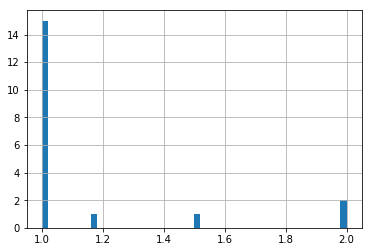

In [17]:
from visualisation import dist_plot

dist_plot(my_df[my_df['email_addresses_per_poi'] > 0]['email_addresses_per_poi'].values)

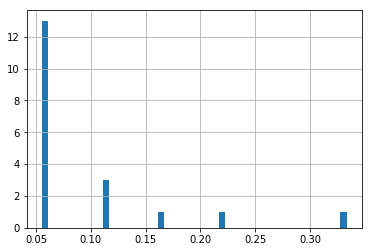

In [18]:
dist_plot(my_df[my_df['poi_mention_rate'] > 0.]['poi_mention_rate'].values)

In [ ]:
### Task 3: Create new feature(s)
# Features:
# - common_vocabulary (failed, not using it in poi_id.py)
# try to find vocabulary patterns between potencial POIs
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_selection import SelectPercentile, f_classif
from sklearn import cross_validation
from feature_engineering import get_email_data_from_pois
from sklearn.cluster import KMeans

email_data, email_authors = get_email_data_from_pois(my_dataset)
vocabf_train, vocabf_test, vocabl_train, vocabl_test = cross_validation.train_test_split(email_data, email_authors, test_size=0.1, random_state=42)

vectorizer = TfidfVectorizer(sublinear_tf=True, max_df=0.1, stop_words='english')
vocabf_train_transformed = vectorizer.fit_transform(vocabf_train)
vocabf_test_transformed  = vectorizer.transform(vocabf_test)

selector = SelectPercentile(f_classif, percentile=10)
selector.fit(vocabf_train_transformed, vocabl_train)
vocabf_train_transformed = selector.transform(vocabf_train_transformed).toarray()
vocabf_test_transformed  = selector.transform(vocabf_test_transformed).toarray()
n_clusters = len(set(vocabl_train))
print 'Training KMeans with %d clusters.' % n_clusters
email_cluster = KMeans(n_clusters=n_clusters, random_state=42)
email_cluster.fit(vocabf_train_transformed, vocabl_train)
dist_plot(email_cluster.labels_)

In [ ]:
# Testing email text cluster
text_p = vectorizer.transform("""For this, you will not only be a critical part of Enron's history, but you will also always deserve Enron's gratitude.""".split())
text_p = selector.transform(text_p)
display(email_cluster.predict(text_p.todense()))

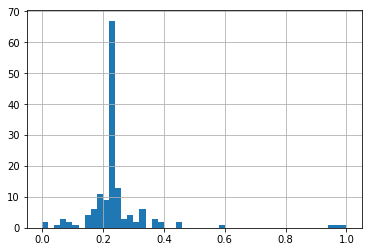

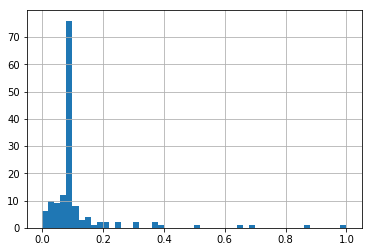

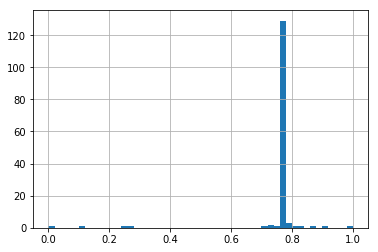

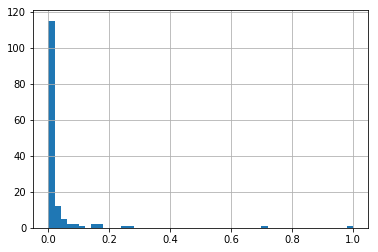

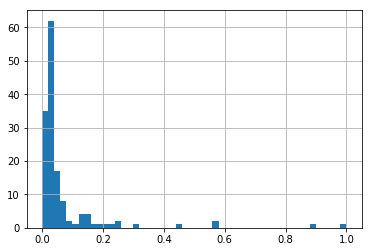

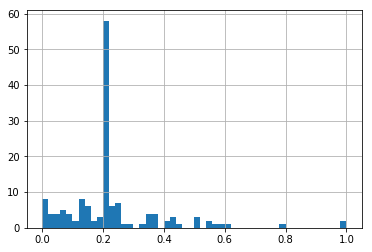

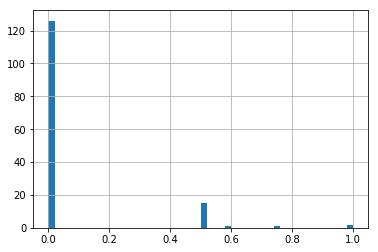

In [20]:
# Feature Scaling
from visualisation import dist_plot
from feature_engineering import scale_feature_df


my_df['salary_scaled'] = scale_feature_df(my_df, 'salary')
my_df['bonus_scaled'] = scale_feature_df(my_df, 'bonus')
my_df['director_fees_scaled'] = scale_feature_df(my_df, 'director_fees')
my_df['other_scaled'] = scale_feature_df(my_df, 'other')
my_df['exercised_stock_options_scaled'] = scale_feature_df(my_df, 'exercised_stock_options')
my_df['expenses_scaled'] = scale_feature_df(my_df, 'expenses')
my_df['email_addresses_per_poi_scaled'] = scale_feature_df(my_df, 'email_addresses_per_poi')

dist_plot(my_df['salary_scaled'].values)
dist_plot(my_df['bonus_scaled'])
dist_plot(my_df['director_fees_scaled'])
dist_plot(my_df['other_scaled'])
dist_plot(my_df['exercised_stock_options_scaled'])
dist_plot(my_df['expenses_scaled'])
dist_plot(my_df['email_addresses_per_poi_scaled'])

In [21]:
### Task 4: Try a variety of classifiers
features_list = ['poi', 'salary_scaled', 'bonus_scaled', 'director_fees_scaled', 
                 'other_scaled', 'exercised_stock_options_scaled', 'expenses_scaled', 
                 'email_addresses_per_poi_scaled', 'poi_mention_rate']

# convert it back to dict, so that I can use featureFormat and targetFeatureSplit functions
my_dataset = my_df.to_dict(orient='index')
### Extract features and labels from dataset for local testing
#data = featureFormat(my_dataset, features_list, sort_keys = True)
#labels, features = targetFeatureSplit(data)

#from sklearn.model_selection import train_test_split
#features_train, features_test, labels_train, labels_test = train_test_split(features, labels, test_size=0.5, random_state=42, shuffle=False)
#display(labels_test)

In [22]:
### Task 4: Try a variety of classifiers
### Please name your classifier clf for easy export below.
### Note that if you want to do PCA or other multi-stage operations,
### you'll need to use Pipelines. For more info:
### http://scikit-learn.org/stable/modules/pipeline.html

# Provided to give you a starting point. Try a variety of classifiers.
#from sklearn.naive_bayes import GaussianNB
#clf = GaussianNB()

# classifier.py
from sklearn.pipeline import Pipeline
from sklearn.svm import SVC
from sklearn.decomposition import PCA
from sklearn.model_selection import GridSearchCV
from sklearn.feature_selection import SelectKBest
from sklearn.ensemble import RandomForestClassifier

In [24]:
# RandomForestClassifier test
param_grid = dict(
    #reduce_dim__n_components=[1,2],
                  #feature_selection__k=[2,3,4,5,'all']
                 )

# Accuracy: 0.86407	Precision: 0.48490	Recall: 0.31300	F1: 0.38043	F2: 0.33689
steps = [
    ('feature_selection', SelectKBest(k=2)), 
    ('reduce_dim', PCA(random_state=42, n_components=2)), 
    ('clf', RandomForestClassifier(n_estimators=40, random_state=42))]
clf = Pipeline(steps)
#grid_search = GridSearchCV(pipe, param_grid=param_grid)
#grid_search.fit(features_train, labels_train)
#display(grid_search)
#pred = grid_search.predict(features_test)
#display(pred)
#display(grid_search.score(features_test, labels_test))  # 0.86206896551724133

from tester import test_classifier
print 'testing classifier...'
t0 = time()
test_classifier(clf=clf, dataset=my_dataset, feature_list=features_list)
print 'elapsed time: %s seconds' % (time() - t0)

testing classifier...
Pipeline(memory=None,
     steps=[('feature_selection', SelectKBest(k=2, score_func=<function f_classif at 0x7fe1a9cbced8>)), ('reduce_dim', PCA(copy=True, iterated_power='auto', n_components=2, random_state=42,
  svd_solver='auto', tol=0.0, whiten=False)), ('clf', RandomForestClassifier(bootstrap=True, class_weight=None, cri...stimators=40, n_jobs=1,
            oob_score=False, random_state=42, verbose=0, warm_start=False))])
	Accuracy: 0.88487	Precision: 0.62353	Recall: 0.34450	F1: 0.44380	F2: 0.37836
	Total predictions: 15000	True positives:  689	False positives:  416	False negatives: 1311	True negatives: 12584

elapsed time: 81.5108411312 seconds


In [25]:
selector = clf.named_steps['feature_selection']
feature_scores = sorted([(f,s) for f,s in zip(features_list[1:], selector.scores_)], key=lambda x: x[1], reverse=True)
display(feature_scores)

[('poi_mention_rate', 37.738144145596294),
 ('exercised_stock_options_scaled', 29.149616495359883),
 ('email_addresses_per_poi_scaled', 18.876489899411894),
 ('bonus_scaled', 17.299191264799362),
 ('salary_scaled', 11.504360571028441),
 ('other_scaled', 4.2584854563227426),
 ('expenses_scaled', 0.32758282468103472),
 ('director_fees_scaled', 0.19044465704543861)]

In [26]:
# SVC test
param_grid = dict(
    #reduce_dim__n_components=[1,2],
                  #feature_selection__k=[2,5,'all'],
                  clf__kernel=['linear', 'rbf'],
                  clf__C=[1.,1000.,10000.],
                  clf__gamma=[0.1,0.5,1.0,'auto'])

# Accuracy: 0.81040	Precision: 0.29554	Recall: 0.30500	F1: 0.30020	F2: 0.30306
steps = [
    ('feature_selection', SelectKBest(k=6)), 
    ('reduce_dim', PCA(random_state=42, n_components=6)), 
    ('clf', SVC(random_state=42, kernel='rbf', C=23000, gamma=.587))]
clf = Pipeline(steps)

#grid_search = GridSearchCV(pipe, param_grid=param_grid)
#grid_search.fit(features_train, labels_train)
#display(grid_search)
#pred = grid_search.predict(features_test)
#display(pred)
#display(grid_search.score(features_test, labels_test))  # 0.89655172413793105

from tester import test_classifier
print 'testing classifier...'
t0 = time()
test_classifier(clf=clf, dataset=my_dataset, feature_list=features_list)
print 'elapsed time: %s seconds' % (time() - t0)

testing classifier...
Pipeline(memory=None,
     steps=[('feature_selection', SelectKBest(k=6, score_func=<function f_classif at 0x7fe1a9cbced8>)), ('reduce_dim', PCA(copy=True, iterated_power='auto', n_components=6, random_state=42,
  svd_solver='auto', tol=0.0, whiten=False)), ('clf', SVC(C=23000, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=0.587, kernel='rbf',
  max_iter=-1, probability=False, random_state=42, shrinking=True,
  tol=0.001, verbose=False))])
	Accuracy: 0.86173	Precision: 0.47383	Recall: 0.33500	F1: 0.39250	F2: 0.35585
	Total predictions: 15000	True positives:  670	False positives:  744	False negatives: 1330	True negatives: 12256

elapsed time: 6.72744107246 seconds


In [27]:
selector = clf.named_steps['feature_selection']
feature_scores = sorted([(f,s) for f,s in zip(features_list[1:], selector.scores_)], key=lambda x: x[1], reverse=True)
display(feature_scores)

[('poi_mention_rate', 37.738144145596294),
 ('exercised_stock_options_scaled', 29.149616495359883),
 ('email_addresses_per_poi_scaled', 18.876489899411894),
 ('bonus_scaled', 17.299191264799362),
 ('salary_scaled', 11.504360571028441),
 ('other_scaled', 4.2584854563227426),
 ('expenses_scaled', 0.32758282468103472),
 ('director_fees_scaled', 0.19044465704543861)]

In [28]:
# AdaBoostClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB

param_grid = dict(
    #reduce_dim__n_components=[1,2],
                  #feature_selection__k=[2,5,'all'],
                  #clf__base_estimator=[DecisionTreeClassifier(), SVC(C=10000, random_state=42, gamma=0.5), GaussianNB()],
                  #clf__n_estimators=[10,50,100],
                  #clf__learning_rate=[0.9,1.]
)

# Accuracy: 0.85460	Precision: 0.43806	Recall: 0.32000	F1: 0.36984	F2: 0.33823
steps = [
    ('feature_selection', SelectKBest(k=2)), 
    ('reduce_dim', PCA(random_state=42, n_components=2)), 
    ('clf', AdaBoostClassifier(algorithm='SAMME.R', random_state=42, n_estimators=40, learning_rate=1.))]
pipe = Pipeline(steps)

#grid_search = GridSearchCV(pipe, param_grid=param_grid)
#grid_search.fit(features_train, labels_train)
#display(grid_search)
#pred = grid_search.predict(features_test)
#display(pred)
#display(grid_search.score(features_test, labels_test))  # 0.89655172413793105

from tester import test_classifier
print 'testing classifier...'
t0 = time()
test_classifier(clf=pipe, dataset=my_dataset, feature_list=features_list)
print 'elapsed time: %s seconds' % (time() - t0)

testing classifier...
Pipeline(memory=None,
     steps=[('feature_selection', SelectKBest(k=2, score_func=<function f_classif at 0x7fe1a9cbced8>)), ('reduce_dim', PCA(copy=True, iterated_power='auto', n_components=2, random_state=42,
  svd_solver='auto', tol=0.0, whiten=False)), ('clf', AdaBoostClassifier(algorithm='SAMME.R', base_estimator=None,
          learning_rate=1.0, n_estimators=40, random_state=42))])
	Accuracy: 0.88420	Precision: 0.61211	Recall: 0.35900	F1: 0.45257	F2: 0.39137
	Total predictions: 15000	True positives:  718	False positives:  455	False negatives: 1282	True negatives: 12545

elapsed time: 67.3188591003 seconds


In [29]:
selector = clf.named_steps['feature_selection']
feature_scores = sorted([(f,s) for f,s in zip(features_list[1:], selector.scores_)], key=lambda x: x[1], reverse=True)
display(feature_scores)

[('poi_mention_rate', 37.738144145596294),
 ('exercised_stock_options_scaled', 29.149616495359883),
 ('email_addresses_per_poi_scaled', 18.876489899411894),
 ('bonus_scaled', 17.299191264799362),
 ('salary_scaled', 11.504360571028441),
 ('other_scaled', 4.2584854563227426),
 ('expenses_scaled', 0.32758282468103472),
 ('director_fees_scaled', 0.19044465704543861)]

In [30]:
# KNeighborsClassifier
from sklearn.neighbors import KNeighborsClassifier

param_grid = dict(
                  #reduce_dim__n_components=[1,2],
                  #feature_selection__k=[2,4,6,'all'],
                  #clf__n_neighbors=[2,3,4,5],
                  #clf__weights=['uniform','distance'],
                  #clf__algorithm=['auto','ball_tree','kd_tree','brute'],
                  #clf__leaf_size=[2,3,4,5],
                  #clf__p=[1,2]
)

# Accuracy: 0.84753	Precision: 0.41147	Recall: 0.33350	F1: 0.36841	F2: 0.34664
steps = [
    ('feature_selection', SelectKBest(k=2)), 
    ('reduce_dim', PCA(random_state=42, n_components=2)), 
    ('clf', KNeighborsClassifier(algorithm='auto', leaf_size=4, n_neighbors=4, p=2, weights='distance'))
]
clf = Pipeline(steps)
#grid_search = GridSearchCV(pipe, param_grid=param_grid)
#grid_search.fit(features_train, labels_train)
#display(grid_search)
#pred = grid_search.predict(features_test)
#display(pred)
#display(grid_search.score(features_test, labels_test))  # 0.86206896551724133

from tester import test_classifier
print 'testing classifier...'
t0 = time()
test_classifier(clf=clf, dataset=my_dataset, feature_list=features_list)
print 'elapsed time: %s seconds' % (time() - t0)

testing classifier...
Pipeline(memory=None,
     steps=[('feature_selection', SelectKBest(k=2, score_func=<function f_classif at 0x7fe1a9cbced8>)), ('reduce_dim', PCA(copy=True, iterated_power='auto', n_components=2, random_state=42,
  svd_solver='auto', tol=0.0, whiten=False)), ('clf', KNeighborsClassifier(algorithm='auto', leaf_size=4, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=4, p=2,
           weights='distance'))])
	Accuracy: 0.88353	Precision: 0.63136	Recall: 0.30400	F1: 0.41039	F2: 0.33917
	Total predictions: 15000	True positives:  608	False positives:  355	False negatives: 1392	True negatives: 12645

elapsed time: 1.90816092491 seconds


In [31]:
# get SelectKBest results after training to use underneath
selector = clf.named_steps['feature_selection']
feature_scores = sorted([(f,s) for f,s in zip(features_list[1:], selector.scores_)], key=lambda x: x[1], reverse=True)
feature_scores

[('poi_mention_rate', 37.738144145596294),
 ('exercised_stock_options_scaled', 29.149616495359883),
 ('email_addresses_per_poi_scaled', 18.876489899411894),
 ('bonus_scaled', 17.299191264799362),
 ('salary_scaled', 11.504360571028441),
 ('other_scaled', 4.2584854563227426),
 ('expenses_scaled', 0.32758282468103472),
 ('director_fees_scaled', 0.19044465704543861)]

In [20]:
### Task 6: Dump your classifier, dataset, and features_list so anyone can
### check your results. You do not need to change anything below, but make sure
### that the version of poi_id.py that you submit can be run on its own and
### generates the necessary .pkl files for validating your results.
dump_classifier_and_data(clf, my_dataset, features_list)

In [32]:
# tester.py
from tester import main as project_tester
project_tester()

Pipeline(memory=None,
     steps=[('feature_selection', SelectKBest(k=2, score_func=<function f_classif at 0x7fe1a9cbced8>)), ('reduce_dim', PCA(copy=True, iterated_power='auto', n_components=2, random_state=42,
  svd_solver='auto', tol=0.0, whiten=False)), ('clf', KNeighborsClassifier(algorithm='auto', leaf_size=4, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=4, p=2,
           weights='distance'))])
	Accuracy: 0.88960	Precision: 0.66863	Recall: 0.34100	F1: 0.45166	F2: 0.37805
	Total predictions: 15000	True positives:  682	False positives:  338	False negatives: 1318	True negatives: 12662



# Process Comments
## Outlier Removal

* I've found [this](https://discussions.udacity.com/t/seems-like-a-gremlin-in-the-data/296901) about a difference between Udacity's and FindLaw's datasets, but I don't find it relevan for the purpose of this project.
* Apart from the well known TOTAL data point, I consider other outliers actually useful, since we are looking for persons of interest, who are precisely not part of the average.

## Feature Scaling

* NaN treatment: I will assign the median salary to data points with missing values, since this average is not affected by outliers as mean is.

## Feature Engineering
All new feature logic is implemented in *feature_engineering.py* file. Functions with prefix *compute_* are used to get the final values for the dataset.

* **from_poi_to_this_person_ratio**: number of messages received from a POI divided by the number of all received messages
* **from_this_person_to_poi_ratio**: number of messages sent to a POI divided by the number of all sent messages
* **email_addresses_per_poi**: amount of email addresses referring to the same POI divided by the number of POIs mentioned in all emails from/to a person
* **poi_mention_rate**: amount of emails where a POI is mentioned divided by all emails from/to a person
* **common_vocabulary (failed)**: The idea was to create clusters of vocabulary from email text in order to detect possible POI patterns, setting TfIdfVectorizer to index only up to 10% document frequency, selecting 10% of vocabulary afterwards, and finally training a KMeans object with n_clusters=number of unique recognised POIs. There are two problems here: First, it predicts the same cluster almost all the time. The second problem is that I don't get only one label, but an array of labels with variable size, depending on how long the email text is. It seems that I have to learn more about this implementation. For the purpose of this project, I'd rather not use this feature for now.

## Classifier Selection
Given the following results, I will keep *KNeighborsClassifier*. Results are quite similar to AdaBoostClassifier, but KNeighborsClassifier was much more efficient in processing time. 

### RandomForestClassifier
* Accuracy: 0.88487	Precision: 0.62353	Recall: 0.34450	F1: 0.44380	F2: 0.37836
* Total predictions: 15000	True positives:  689	False positives:  416	False negatives: 1311	True negatives: 12584
* Elapsed time: 490.22569418 seconds

### SVC
* Accuracy: 0.86173	Precision: 0.47383	Recall: 0.33500	F1: 0.39250	F2: 0.35585
* Total predictions: 15000	True positives:  670	False positives:  744	False negatives: 1330	True negatives: 12256
* Elapsed time: 6.6656460762 seconds
* What is really remarkable from SVM is that it had better performance with more features. I got these results selecting the best 6.

### AdaBoostClassifier
* Accuracy: 0.88420	Precision: 0.61211	Recall: 0.35900	F1: 0.45257	F2: 0.39137
	Total predictions: 15000	True positives:  718	False positives:  455	False negatives: 1282	True negatives: 12545
* Elapsed time: 71.661303997 seconds

### KNeighborsClassifier
* Accuracy: 0.88353	Precision: 0.63136	Recall: 0.30400	F1: 0.41039	F2: 0.33917
* Total predictions: 15000	True positives:  608	False positives:  355	False negatives: 1392	True negatives: 12645
* Elapsed time: 1.72607684135 seconds

## Enron Submission Free-Response Questions

### Question 1 
Summarize for us the goal of this project and how machine learning is useful in trying to accomplish it. As part of your answer, give some background on the dataset and how it can be used to answer the project question. Were there any outliers in the data when you got it, and how did you handle those?  [relevant rubric items: “data exploration”, “outlier investigation”]

### Answer
The goal of this project consist of creating a machine learning algorithm able to predict whether a person from a given data set could be a person of interest, meaning a person suspected to be corrupt and involved in the fraud.
Machine learning can help in this task by quantifying information, selecting the most useful variables and applying a predictive model to calculate the probability of being a person of interest for each row of the dataset, and finally testing the results to see how accurate the model was.

There were many outliers in the data set. However, most of them were actually useful because that's what we wanted to find. Only one outlier was actually wrong information, the one with key *TOTAL*, and I removed it.

This is a quick summary of the dataset:

* total number of data points: 146
* outliers: 3
* allocation across classes (POI/non-POI): 18 POI/125 non-POI
* number of features used: 6

##### Features with many missing values
* Salary: 51
* Bonus: 64
* Deferral Payments: 107
* Deferred Income: 97
* Director Fees: 129
* Email Address: 34
* Exercised Stock Options: 44
* Expenses: 51
* Messages (from): 59
* From POI to this person: 59
* From this person to POI: 59
* Loan Advances: 142
* Long Term Incentive: 80
* Other: 53
* Restricted Stock: 36
* Restricted Stock Deferred: 128
* Salary: 51
* Shared Receipt with POI: 59
* Messages (to): 59
* Total Payments: 21
* Total Stock Value: 20

### Question 2
What features did you end up using in your POI identifier, and what selection process did you use to pick them? Did you have to do any scaling? Why or why not? As part of the assignment, you should attempt to engineer your own feature that does not come ready-made in the dataset -- explain what feature you tried to make, and the rationale behind it. (You do not necessarily have to use it in the final analysis, only engineer and test it.) In your feature selection step, if you used an algorithm like a decision tree, please also give the feature importances of the features that you use, and if you used an automated feature selection function like SelectKBest, please report the feature scores and reasons for your choice of parameter values.  [relevant rubric items: “create new features”, “intelligently select features”, “properly scale features”]

### Answer
From the original data set, I considered important to use *salary*, *bonus*, *director_fees*, *exercised_stock_options*, and *other* individually important. I didn't take *total_payments* as a whole because the sum of the values could hide possible suspicious patterns.

I also created new features: *poi_mention_rate* (pois mentioned in email bodies related to each person), *email_addresses_per_poi* (number of email addresses used by a person referring to the same POI), and *common_vocabulary* (failed and not used feature, as you can see above in this Notebook).

#### Feature Scaling
I scaled features using MinMaxScaler, setting missing values using the median of each column, as it's not affected by outliers:

* salary_scaled
* bonus_scaled
* director_fees_scaled
* other_scaled
* exercised_stock_options_scaled
* expenses_scaled
* email_addresses_per_poi_scaled

#### Feature Scores
I used SelectKBest to get a good feature importance.

* poi_mention_rate: 37.7381
* exercised_stock_options_scaled: 29.1496
* email_addresses_per_poi_scaled: 18.8765
* bonus_scaled: 17.2992
* salary_scaled: 11.5044
* other_scaled: 4.2585
* expenses_scaled: 0.3276
* director_fees_scaled: 0.1904

#### Classifier Results using this feature selection configuration
Accuracy: 0.88353	Precision: 0.63136	Recall: 0.30400	F1: 0.41039	F2: 0.33917

#### Not including poi_mention_rate
Accuracy: 0.83880	Precision: 0.32378	Recall: 0.19200	F1: 0.24105	F2: 0.20901

#### Not including email_addresses_per_poi_scaled
Accuracy: 0.88507	Precision: 0.63663	Recall: 0.32150	F1: 0.42724	F2: 0.35683

#### Using only scaled versions of original features
Accuracy: 0.84773	Precision: 0.41278	Recall: 0.33600	F1: 0.37045	F2: 0.34898

### Question 3
What algorithm did you end up using? What other one(s) did you try? How did model performance differ between algorithms?  [relevant rubric item: “pick an algorithm”]

### Answer
I tested the following classifiers, using SelectKBest with *k=2*, and PCA with *n_components=2* (after testing different parameters) in a Pipeline: RandomForestClassifier, SVC, AdaBoostClassifier, KNeighborsClassifier.

The only exception was SVC, which had a better performance with SelectKBest set as *k=6* instead of 2.

My final decision was KNeighborsClassifier. As you can see above in my [comments](#Classifier-Selection), its accuracy was one of the best, as well as its precision, but recall was the lowest among the classifiers I tested. Though, above 0.3, as required. KNeighborsClassifier was also much faster than other classifiers. I think this also counts a lot when working with big datasets.

### Question 4
What does it mean to tune the parameters of an algorithm, and what can happen if you don’t do this well?  How did you tune the parameters of your particular algorithm? What parameters did you tune? (Some algorithms do not have parameters that you need to tune -- if this is the case for the one you picked, identify and briefly explain how you would have done it for the model that was not your final choice or a different model that does utilize parameter tuning, e.g. a decision tree classifier).  [relevant rubric items: “discuss parameter tuning”, “tune the algorithm”]

### Answer
Parameter tuning is an important process of machine learning, in order to get the best performance of the algorithm being used. Those parameters are related to the data set and the type of data used on each feature. This is one of the reasons to call machine learning an *artistic* work, because the same parameter set won't necessarily work fine with other dataset.

In this project, I got several examples of parameter tuning effect on classifier performance.
I used GridSearchCV on each classifier testing a number of values for each parameter. But when I was more confident about the range of value to use I moved the parameters to the static configuration, because each value multiplies the time spent by GridSearchCV to test all values. Especially when running the classifier with K-Fold Cross Validation, the first test took more than 3 hours to finish, while without GridSearchCV it took just a few seconds. Then I had to fine-tune parameters by hand. I found this way much faster.

#### Some examples of parameter tuning in my project
SVC's C parameter is a number with a large range of possible values. Setting it to 1, to 1000 or to 10000 make the algorithm apply a penalty to the calculated error. which means that large values of C result in low bias and high variance. The opposite effect occurs with a high value ofo C.

SVC's gamma parameter (from o to 1) gives control of the gaussian peak on non-linear classifications, using kernel='rbf'. A value of gamma close to 0 results in low bias and high variance. The opposite will happen using a value close to 1.

Playing with C and gamma, I ended up getting good metrics with C=23000, gamma=.587. A tiny difference in any of both parameters would make decrease the performance.

SelectKBest's k parameter was definitely a big influence in all my tests, in a less ambiguous way. Selecting more features affected the metrics right away. It affected the results of all tested classifiers.

#### Risks when tuning parameters
Parameter tuning is responsible of over/under fitting a model. While each parameter has different approaches, all of them end up with poor performance (underfitting, provoking high variance) in training time and not being suitable for predictions, or with too good performance in training time (overfitting, provoking high bias), and poor performance in prediction time.  

### Question 5
What is validation, and what’s a classic mistake you can make if you do it wrong? How did you validate your analysis?  [relevant rubric items: “discuss validation”, “validation strategy”]

### Answer
Validation is the simple process of testing the classifier with data points that the classifier has never seen before against the true results. A technique used in this course is called K-Fold Cross Validation, which consists in splitting the data set in k pieces. Iterating k times, the classifier will use all pieces except one as a training set, and the one not used for training will be used for testing. A common error is not to shuffle the data set before splitting it. Resulting in an imbalanced training set, training for one class and testing for another class. It is important to use validation techniques to make sure that the algorithm is doing what is expected to do.

At the beginning of the project, I splitted the data set and calculated scores. But going further I started using K-Fold Cross Validation to get a much more robust validation.

In addition, since this data set is quite small and highly imbalanced, I used *StratifiedShuffleSplit* in order to split the dataset making sure that every fold will be representative of the whole.

### Question 6
Give at least 2 evaluation metrics and your average performance for each of them.  Explain an interpretation of your metrics that says something human-understandable about your algorithm’s performance. [relevant rubric item: “usage of evaluation metrics”]

### Answer
After validating prediction results, there are several ways to evaluate the results in a more concrete and accurate way, given each individual prediction compared to the true value (true positive, true negative, false positive, false negative). A confusion matrix could be used to visualise this information.

The metrics that I learned in this course were recall, precision and f1-score.

* **recall** (also called sensitivity): relevant instances that have been retrieved over the total amount of relevant instances
* **precision**: relevant instances among the retrieved instances
* **f1-score**: measure of test's accuracy using both recall and precision

In this project I got good accuracy score (over 0.88) but quite low recall (about 0.6) and precision (about 0.3). The reasons are two: too small dataset, and the so called problem class imbalance (18 POI against 125 non-POI), although StratifiedShuffleSplit has been used.

#### Recall = 0.6
It means that the algorithm predicted 60% of relevant elements over all retrieved elements.

#### Precision = 0.3
It means that only 30% of predicted elements were relevant over all retrieved elements.